# The Impacts of Different Music Genres and Temperature on Running

_By: Riley Sikes_  
_Class: CPSC 22, Fall 2020_

## Introduction

### Domain

* My project is about my running and the impact the different music I listen to and the temperature has on my pace, time, etc. Each run is roughly a 5k and I run the same course everytime so it's easy to track change. I started running this route on October 5th and ran 3 times a week, totaling 30 runs, 10 for each of the genres I listened to up until December 10th. I have three different playlists that I shuffle through (that I made): Pop, Rap, and Folk. 
* I get my weather data from [this](https://www.wunderground.com/history/daily/us/wa/spokane/KGEG/date/2020-11-19) website that allows me to get the weather at the time I ran. 
* So the domain would be a combination between the fitness, music, and weather domains.

### Hypotheses

* My hypotheses are that on average my fastest runs, when grouped by playlist, will be in order of Rap, Pop, and Folk. I also think that my faster runs will be towards the end of the semester because I'll probably be getting slightly faster over time. I also think that we will see a correlation between colder temperatures and faster times. 

### Classification Method

* The task I chose to use machine learning was predicting the music genre when given running statistics and temperature. **MORE HERE ON RESULTS**


## Data Analysis

#### Strava (and Temperature) Data
* The strava data is automatically collected each time I run. It uses a .csv format to store the data. It keeps track of a bunch of statistics like distance, moving time, elevation gain and loss, average speed, etc, but we're mainly going to be looking at average speed.
* To clean/prepare the data I had to delete columns that had characters that pandas couldn't process and convert some values to different units (like m/s to mph for average speed). I also went in afterwards and manually added the temperature at the time I ran from the website linked above.


#### Spotify Data
* The spotify data is automatically collected anytime I play a song on spotify. It keeps track of each song I listen to in a JSON format. The individual songs I listen to aren't as important as the general genre of the music I'm listneing to, so this data isn't super necessary. It does allow for other analysis to be done in the future, like using the spotify API to get the genre of each song to see how accurate my song groupings are.


### Exploratory Data Analysis

In [1]:
# converting the .JSON to .CSV so it's easier to see the tables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


spotify_df = pd.read_json("StreamingHistory2.json")
spotify_df.to_csv("SpotifyHistory.csv")

playlist_df = pd.read_json("Playlist1.json")
playlist_df.to_csv("Playlists.csv")

og_strava_df = pd.read_csv("StravaFinalRuns.csv")
strava_df = og_strava_df.copy()

print(strava_df)

    Activity ID            Activity Date  Temperature at Start  \
0    4154714917   Oct 05, 2020, 15:21:27                    56   
1    4159119026   Oct 06, 2020, 15:31:11                    60   
2    4163716176   Oct 07, 2020, 15:21:07                    60   
3    4185799370   Oct 12, 2020, 15:32:42                    52   
4    4194403989   Oct 14, 2020, 15:37:36                    44   
5    4198694603   Oct 15, 2020, 15:41:38                    40   
6    4216329856   Oct 19, 2020, 15:48:20                    50   
7    4224815789   Oct 21, 2020, 15:38:53                    36   
8    4229170162   Oct 22, 2020, 15:52:57                    35   
9    4252206446   Oct 27, 2020, 23:00:48                    40   
10   4259000231   Oct 29, 2020, 16:16:06                    46   
11   4267909458   Oct 31, 2020, 17:31:45                    44   
12   4276747955   Nov 02, 2020, 17:03:17                    38   
13   4285918046   Nov 04, 2020, 17:06:56                    54   
14   42905

In [2]:
# converting the average speed and max speed from meter/second to miles/hour
for i in range(len(strava_df["Average Speed"])):
    strava_df.iloc[i, 10] = float(strava_df.iloc[i, 10]) * 2.23694
    strava_df.iloc[i, 9] = float(strava_df.iloc[i, 9]) * 2.23694

#### Plotting Data
* Below I plot the average speed, start temperature, and max speed for all my runs below. Just by looking at the data it seems like there might be a slight increase over time for the speed graphs. The temperature graph depicts a general decreasing trend which is expected because my dataset is collected from October 5th to December 10th.

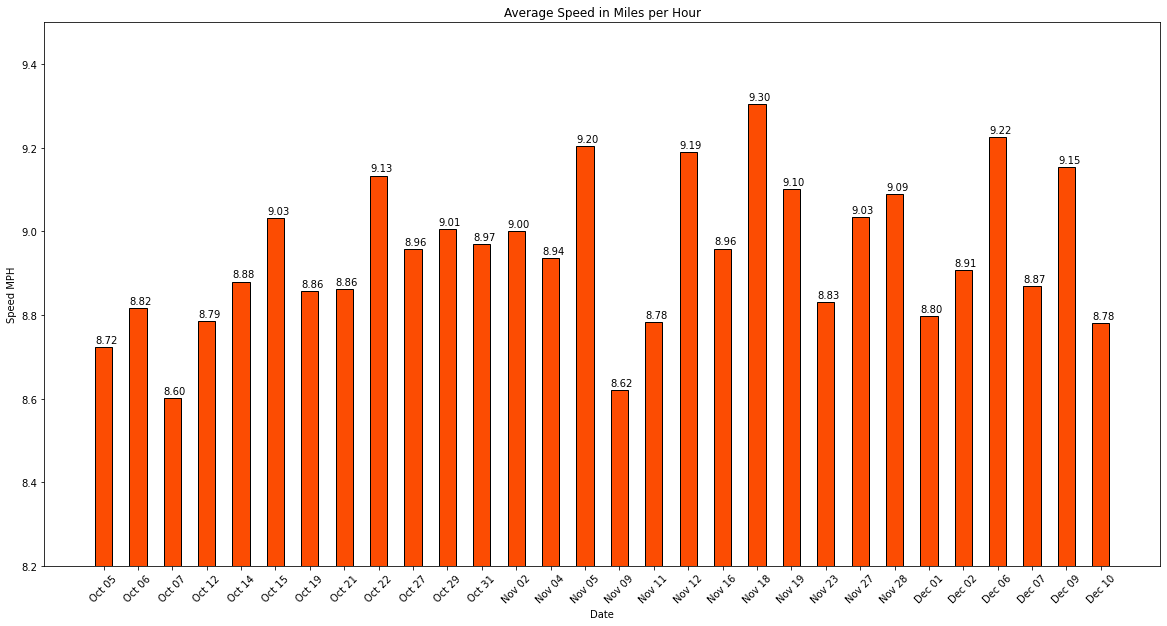

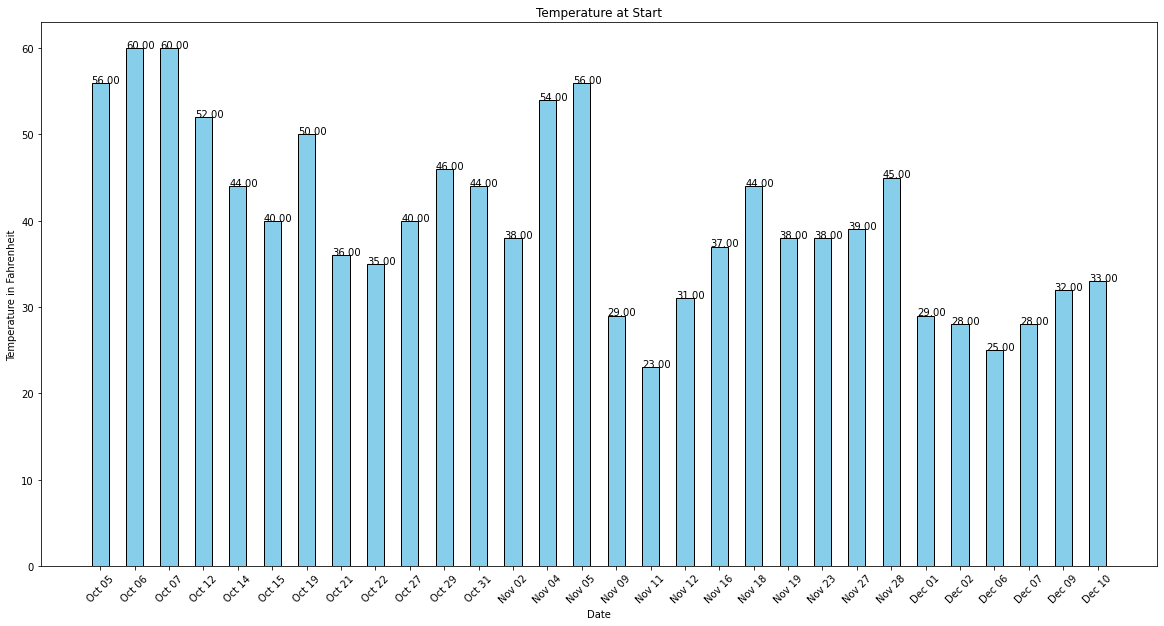

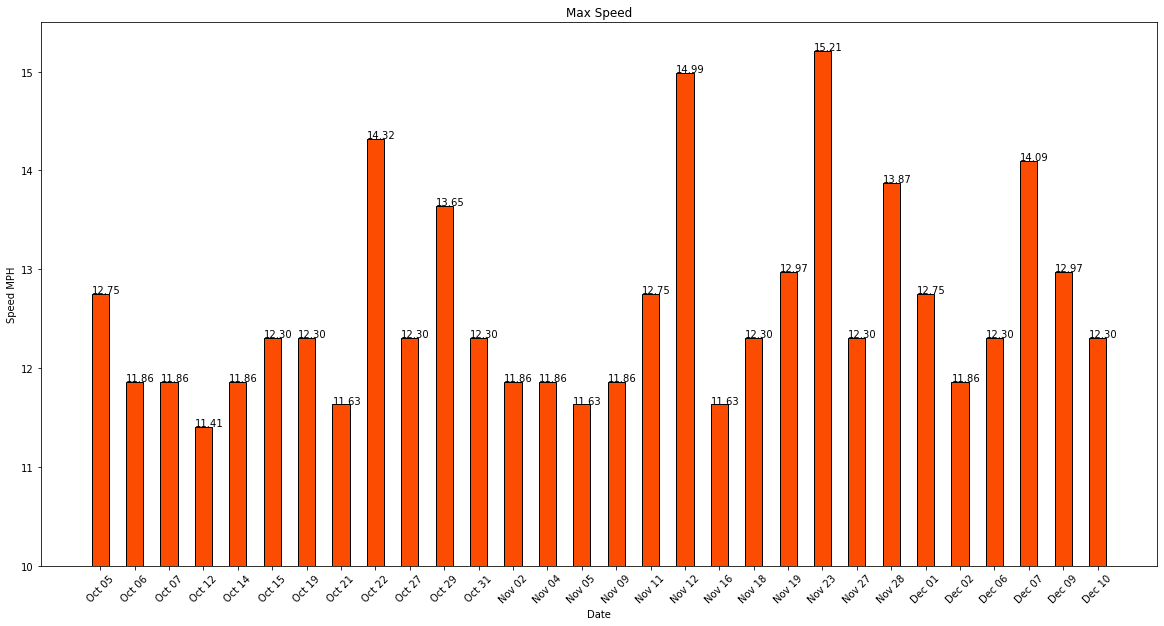

In [3]:
def bar_chart(x, y, title, size, attribute):
    '''
    Description: Takes in two columns/lists and plots them to a bar graph.
    Also uses the title parameter to label the graph.
    '''
    if size == "big":
        plt.figure(figsize = (20,10))
    else:
        plt.figure()
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    if attribute == "Average Speed":
        plt.bar(x, y, width = .5, color = "#FC4C02", edgecolor = "black") # color is strava red
        plt.ylabel("Speed MPH")
        plt.ylim([8.2, 9.5])
    elif attribute == "Temperature":
        plt.ylabel("Temperature in Fahrenheit")
        plt.bar(x, y, width = .5, color = "#87ceeb", edgecolor = "black")
    elif attribute == "Max Speed":
        plt.bar(x, y, width = .5, color = "#FC4C02", edgecolor = "black") # color is strava red
        plt.ylabel("Speed MPH")
        plt.ylim([10, 15.5])  
    plt.title(title)
    for a, b in enumerate(y):
        plt.text(a - .25, b + .01, str("{:.2f}".format(b)))
    plt.show()  


average_speed_ser = strava_df["Average Speed"]
temperature_ser = strava_df["Temperature at Start"]
dates_ser = strava_df["Activity Date"].copy()
for i in range(0, len(dates_ser)):
    dates_ser.loc[i] = ((dates_ser.loc[i]).split(",", maxsplit = 1)[0])

bar_chart(dates_ser, average_speed_ser, "Average Speed in Miles per Hour", "big", "Average Speed")
bar_chart(dates_ser, temperature_ser, "Temperature at Start", "big", "Temperature")
bar_chart(dates_ser, strava_df["Max Speed"], "Max Speed", "big", "Max Speed")

* I made a box plot here because I think they're an interetsing visual for looking at averages and outliers. By looking at this we can see that there aren't any significant outliers and the average is spread pretty evenly above and below the mean value.

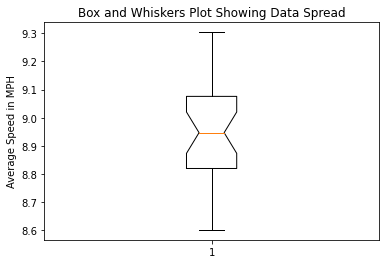

In [4]:
plt.figure()
plt.ylabel("Average Speed in MPH")
plt.title("Box and Whiskers Plot Showing Data Spread")
plt.boxplot(strava_df["Average Speed"], notch = True)
plt.show()

* I also group my runs by genre listend to and plot them in separate smaller bar graphs and print the average speed for each of them. By looking at this we can see that the average speed when I listen to my Folk playlist was the slowest, Pop was in the middle, and Rap was the fastest.

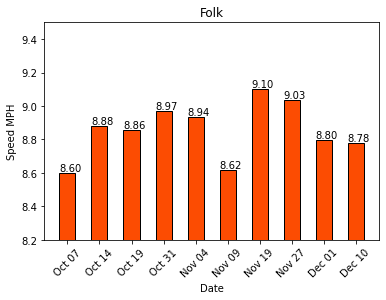

Average Speed When Listening to  Folk  Genre:  8.857546830598903


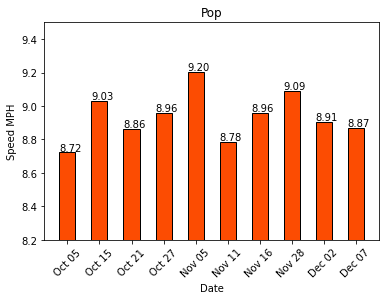

Average Speed When Listening to  Pop  Genre:  8.938431559116658


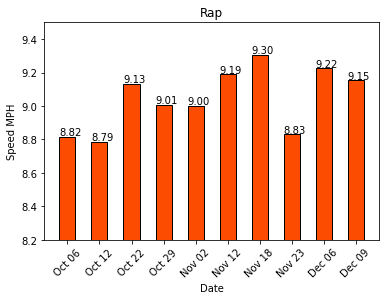

Average Speed When Listening to  Rap  Genre:  9.044166085894087


In [5]:
grouped_by_genre = strava_df.groupby("Activity Description")

folk_df = pd.DataFrame()
rap_df = pd.DataFrame()
pop_df = pd.DataFrame()


for group_name, group_df in grouped_by_genre:
    if group_name == "Pop":
        pop_df = group_df
    elif group_name == "Rap":
        rap_df = group_df
    elif group_name == "Folk":
        folk_df = group_df

    dates_ser = group_df["Activity Date"].copy()
    for i in range(len(dates_ser)):
        dates_ser.iloc[i] = ((dates_ser.iloc[i]).split(",")[0])
        
    bar_chart(dates_ser, group_df["Average Speed"], group_name, "small", "Average Speed")
    average_genre_speed = group_df["Average Speed"].mean()
    print("Average Speed When Listening to ", group_name, " Genre: ", average_genre_speed)

#### Hypothesis Testing
Testing to see if the average speed for my Rap runs is greater than the average speed for my Folk runs with a level of significance of 0.025.

##### Null Hypothesis

$H_0: \mu_{folk} >= \mu_{rap}$  
$H_1: \mu_{folk} < \mu_{rap}$

##### Level of Significance

$\alpha = 0.025$

##### Test Statisitc  
One tailed, independent data sets 
* $ t = \frac{\bar {x_1} - \bar {x_2}}{\sqrt{S_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} $

##### Decision Rule
n = 10 for folk  
n = 10 for rap  
df = 10 + 10 - 2 = 18  
t-critical for a two tailed test with df of 18 and level of significance of 0.025 is 2.093 

If t-computed > 2.093 then reject $H_0$  
If t-computed <= 2.093 then don't reject $H_0$

##### Make Decision


In [6]:
t_computed, p_value = stats.ttest_ind(rap_df["Average Speed"], folk_df["Average Speed"])
print(t_computed, p_value/2)

2.3887085885664914 0.014034716712210715


* t-computed is 2.3887 which is greater than 2.093 so reject $H_0$ and p-value
    is less than $\alpha$ so reject.
* Therefore we can say that my average speed for running while listening to rap music is greater than my average speed while listening to folk music with a level of significance 0.025.
    * I played around with the number a little and found that if the level of significance is 0.01 (98% confidence) insted of 0.025, we fail to reject $H_0$

***
Testing to see if the average speed for my Rap runs is greater than the average speed for my Pop runs with a level of significance of 0.025.

##### Null Hypothesis

$H_0: \mu_{pop} >= \mu_{rap}$  
$H_1: \mu_{pop} < \mu_{rap}$

##### Level of Significance

$\alpha = 0.025$

##### Test Statisitc  
One tailed, independent data sets 
* $ t = \frac{\bar {x_1} - \bar {x_2}}{\sqrt{S_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} $

##### Decision Rule
n = 10 for pop  
n = 10 for rap  
df = 10 + 10 - 2 = 18  
t-critical for a two tailed test with df of 18 and level of significance of 0.025 is 2.093 

If t-computed > 2.093 then reject $H_0$  
If t-computed <= 2.093 then don't reject $H_0$

##### Make Decision


In [7]:
t_computed, p_value = stats.ttest_ind(rap_df["Average Speed"], pop_df["Average Speed"])
print(t_computed, p_value/2)

1.428942406000926 0.08507286332111313


* t-computed is 1.4289 which is less than 2.093 so do not reject $H_0$ and p-value
    is greater than $\alpha$ so do not reject.
* Therefore we can say that my average speed for running while listening to rap music is not greater than my average speed while listening to pop music with a level of significance of 0.025.
    * If we were to use 0.1 as our level of significance, we would reject $H_0$ because t-critical would be 1.330 which is less than 1.4289 and greater than the p-value

***
#### Change in Average Speed Over Time

* I also wanted to see if the average speed increased from my early runs to my later runs. To do this I'm going to get the average from my first 15 runs and compare it to my recent 15 runs, just to quicky see if there's a difference.

In [8]:
first_runs_df = strava_df.iloc[:15,:]
recent_runs_df = strava_df.iloc[15:,:]

print("Average speed for first 15 runs:", first_runs_df["Average Speed"].mean())
print("Average speed for recent 15 runs:", recent_runs_df["Average Speed"].mean())

Average speed for first 15 runs: 8.917502770324107
Average speed for recent 15 runs: 8.975926880082328


* Looking at this there is a slight increase of my average speed by about 0.06 mph, but this might not be significant.


#### Hypothesis Testing

Testing to see if the average speed for my recent runs is greater than my first runs with a level of significance of 0.25
##### Null Hypothesis

$H_0: \mu_{first} >= \mu_{recent}$  
$H_1: \mu_{first} < \mu_{recent}$

##### Level of Significance

$\alpha = 0.025$

##### Test Statisitc  
One tailed, independent data sets 
* $ t = \frac{\bar {x_1} - \bar {x_2}}{\sqrt{S_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} $

##### Decision Rule
n = 15 for first
n = 15 for recent
df = 15 + 15 - 2 = 28  
t-critical for a two tailed test with df of 28 and level of significance of 0.025 is 2.048 

If t-computed > 2.048 then reject $H_0$  
If t-computed <= 2.048 then don't reject $H_0$

##### Make Decision


In [9]:
t_computed, p_value = stats.ttest_ind(recent_runs_df["Average Speed"], first_runs_df["Average Speed"])
print(t_computed, p_value/2)

0.9006441012207426 0.18772960188692384


* t-computed is 0.9 which is less than 2.048 so do not reject $H_0$ and p-value
    is greater than $\alpha$ so do not reject.
* Therefore we can say that my average speed for running in the beginning is not greater than my average speed while running recently with a level of significance of 0.025.
***

#### Impact from Temperature

* While running I noticed that when it was warmer out I felt pretty slow (probably because I'm not accustomed to the heat) and when it was really cold, I had to slow down for the ice. So I split the strava data into two groups: a group with temperatures 35-50, and those < 35 and > 50. I chose these temperatures because it evely splits the data.

In [10]:
good_temps = []
extreme_temps = []

for i in range(len(strava_df["Temperature at Start"])):
    if strava_df.iloc[i, 2] >= 35 and strava_df.iloc[i, 2] <= 50:
        good_temps.append(strava_df.iloc[i,10])
    else:
        extreme_temps.append(strava_df.iloc[i, 10])

good_temps_ser = pd.Series(good_temps)
extreme_temps_ser = pd.Series(extreme_temps)
        
print("Average speed in the moderate temperatur range [35 - 50]:", good_temps_ser.mean())
print("Average speed in the extreme temperature range [< 35 and > 50]", extreme_temps_ser.mean())

Average speed in the moderate temperatur range [35 - 50]: 9.00093422945618
Average speed in the extreme temperature range [< 35 and > 50] 8.892495420950256


* Looking at this, we see there is a slight difference in my average speeds by about 0.01, but this might not be significant. 


#### Hypothesis Testing
Testing to see if my average speed was faster when the temperature was 35-50 compared to the other temperatures with a level of significance of 0.25.

##### Null Hypothesis

$H_0: \mu_{extremes} >= \mu_{moderate}$  
$H_1: \mu_{extremes} < \mu_{moderate}$

##### Level of Significance

$\alpha = 0.025$

##### Test Statisitc  
One tailed, independent data sets 
* $ t = \frac{\bar {x_1} - \bar {x_2}}{\sqrt{S_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} $

##### Decision Rule
n = 15 for moderate
n = 15 for extremes
df = 15 + 15 - 2 = 28  
t-critical for a two tailed test with df of 28 and level of significance of 0.025 is 2.048 

If t-computed > 2.048 then reject $H_0$  
If t-computed <= 2.048 then don't reject $H_0$

##### Make Decision


In [11]:
t_computed, p_value = stats.ttest_ind(good_temps_ser, extreme_temps_ser)
print(t_computed, p_value/2)

1.7341969641723387 0.046940937378691976


* t-computed is 1.7342 which is less than 2.048 so do not reject $H_0$ and p-value
    is greater than $\alpha$ so do not reject.
* Therefore we can say that my average speed for running in moderate temperatures is not greater than my average speed while running in extreme temperatures with a level of significance of 0.025.
    * If we were to use 0.05 as our level of significance, we would reject $H_0$ because t-critical would be 1.701 which is less than 1.7342 and greater than the p-value.
***

#### Spotify Data


* By putting the date (formatted like 'Oct 06') of the run into the first paramater in the function below, it will print out all the songs I listend to while running.

In [84]:
def print_songs(Date, strava_df, spotify_df):
    date_index = -1
    for i in range(len(strava_df)):
        if Date == strava_df.iloc[i,1].split(",")[0]:
            date_index = i
    if date_index == -1:
        print("That's not a valid date, the valid dates are displayed on the x-axis on the graphs above")
        print("All dates must be two atleast two integers, so 09 instead of 9")
    else:
        string_time = og_strava_df.iloc[date_index,1].split(", ")[2]
        start_time_list = string_time.split(":")
        start_time = (int(start_time_list[0]) * 60 * 60) + (int(start_time_list[1]) * 60) + int(start_time_list[2]) - 120
        moving_time = int(strava_df.iloc[date_index, 7])
        end_time = start_time + moving_time + 120
    
        # print(spotify_df)
    
        for i in range(len(spotify_df)):
            # grabbing the date and time to format them to match the strava date and time
            # Like Oct 6 and by seconds instead of by hour:minute
            date_time = spotify_df.iloc[i,0].split(" ")
            date = date_time[0]
            time = date_time[1]
            cleaned_time = int(time.split(":")[0]) * 60 * 60 + int(time.split(":")[1]) * 60

            year_month_day = date.split("-")
            month = year_month_day[1]
            day = year_month_day[2]
            #print(month, day)
            cleaned_date = ""
            if month == "10":
                cleaned_date = "Oct " + day
            elif month == "11":
                cleaned_date = "Nov " + day
            elif month == "12":
                cleaned_date = "Dec " + day
            
            #song_title_ser = pd.Series(dtype=str)
            #song_artist_ser = pd.Series(dtype=str)
            if cleaned_date == Date:
                if cleaned_time >= start_time and cleaned_time <= end_time:              
                    print("Song:", spotify_df.iloc[i,2]) 
                    print("Artist:", spotify_df.iloc[i,1])
                    print()
                
    
print_songs("Nov 11", strava_df, spotify_df)

Song: Lift Yourself
Artist: Kanye West

Song: Space Oddity - 2015 Remaster
Artist: David Bowie

Song: I Think We're Alone Now - Single Version
Artist: Tommy James & The Shondells

Song: Toxic
Artist: Britney Spears

Song: Electric Love
Artist: BØRNS

Song: Mr. Jones
Artist: Counting Crows



## Classification Results

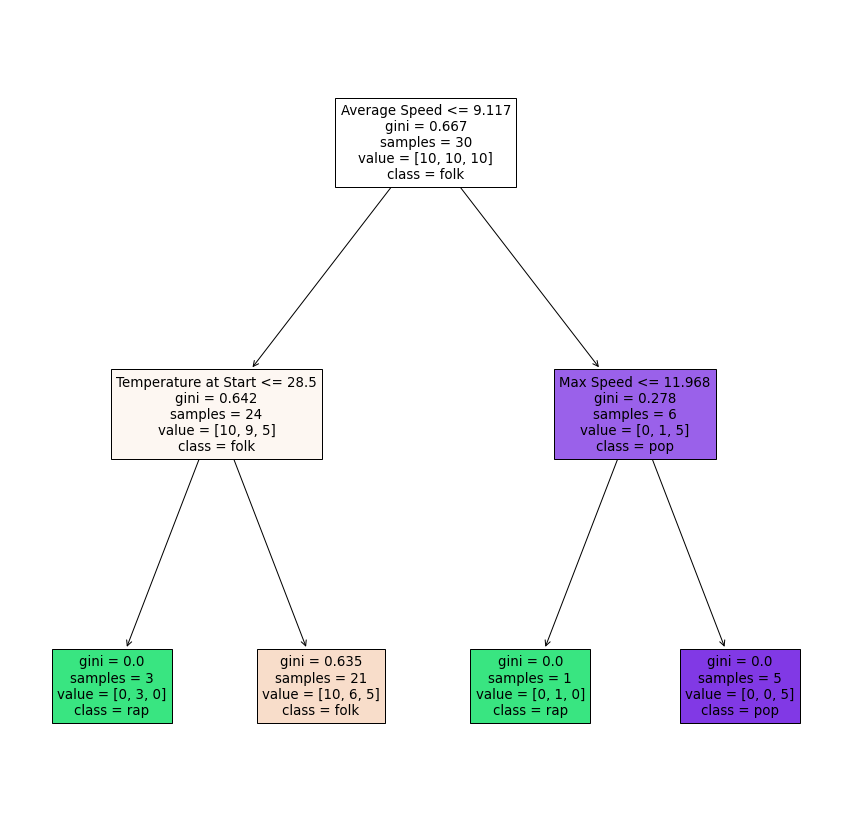

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#print(strava_df)
y = strava_df["Activity Description"]
X = strava_df.drop(["Activity Description", "Activity ID", "Activity Date", "Activity Name", "Activity Type", "Average Grade", "Max Grade", "Elevation Loss", "Grade Adjusted Distance", "Elevation Gain"], axis = 1)

clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X,y)


plt.figure(figsize=(15,15))
tree.plot_tree(clf, feature_names=X.columns, class_names = {2: "pop", 1: "rap", 0: "folk"}, filled=True)
plt.show()

In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.25)

In [82]:
clf.fit(X_train, y_train)

accuracy_tree = clf.score(X_test, y_test)
print(accuracy_tree)

from sklearn.neighbors import KNeighborsClassifier
# Changed the n_neighbors to 5 because that was the best accuracy I could get it too
clf = KNeighborsClassifier(n_neighbors=6, metric="euclidean")
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.5
0.5
